# Taller Práctico Clase 1: Introducción a Machine Learning

**Objetivo:** En este notebook, aplicaremos los conceptos fundamentales vistos en clase. Nos familiarizaremos con las herramientas básicas y realizaremos el paso más crucial antes de entrenar cualquier modelo: la preparación y división de nuestros datos.

**Pasos a seguir:**
1.  **Importar librerías:** Cargar las herramientas que necesitaremos.
2.  **Cargar el dataset:** Usaremos el famoso dataset "Iris".
3.  **Exploración de Datos (EDA):** Entenderemos la estructura y contenido de nuestros datos.
4.  **Visualización simple:** Crearemos gráficos para observar las relaciones entre variables.
5.  **División Train-Test:** Separaremos nuestros datos en conjuntos de entrenamiento y prueba.

---

### 1. Importar Librerías

Primero, importamos las librerías que usaremos. Es una buena práctica hacerlo al inicio del notebook.
- **pandas:** Para manipulación de datos en formato de tabla (DataFrame).
- **scikit-learn:** La librería de Machine Learning por excelencia en Python. La usaremos para cargar el dataset y para dividir los datos.
- **matplotlib:** Para crear visualizaciones.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

print("Librerías importadas correctamente!")

Librerías importadas correctamente!


---

### 2. Cargar el Dataset

Vamos a cargar el dataset **Iris**, que viene incluido en `scikit-learn`. Este dataset contiene mediciones de 3 especies diferentes de flores de Iris.

El objeto que carga `scikit-learn` tiene varias partes útiles:
- `data`: Contiene las características (features) de las flores (largo y ancho de sépalo y pétalo).
- `target`: Contiene la etiqueta o especie de cada flor (la variable que queremos predecir).
- `feature_names`: Los nombres de las columnas en `data`.
- `target_names`: Los nombres de las especies en `target`.

In [2]:
# Cargamos el dataset
iris_raw = load_iris()

# Convertimos los datos a un DataFrame de pandas para facilitar su manipulación
# Las columnas serán los nombres de las características
iris_df = pd.DataFrame(data=iris_raw.data, columns=iris_raw.feature_names)

# Añadimos la columna 'species' (nuestro objetivo o target)
iris_df['species'] = iris_raw.target

# Mapeamos los números del target a los nombres de las especies para mayor claridad
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species_name'] = iris_df['species'].map(species_map)

---

### 3. Exploración de Datos (EDA)

Antes de hacer cualquier modelo, debemos entender nuestros datos. ¿Cómo se ven? ¿Cuántos datos tenemos? ¿Hay valores faltantes?

In [3]:
# Visualizamos las primeras 5 filas del DataFrame
print("Primeras 5 filas del dataset:")
iris_df.head()

Primeras 5 filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
# Obtenemos información general del DataFrame
# Nos muestra el tipo de datos por columna y si hay valores nulos.
print("Información general del dataset:")
iris_df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Obtenemos un resumen estadístico de las columnas numéricas
print("Resumen estadístico:")
iris_df.describe()

Resumen estadístico:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Contamos cuántas muestras tenemos de cada especie
# Esto es importante para saber si el dataset está balanceado
print("Distribución de especies:")
iris_df['species_name'].value_counts()

Distribución de especies:


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

> **Observación:** El dataset está perfectamente balanceado, con 50 muestras de cada especie. Esto es ideal, pero no es común en problemas del mundo real.

---

### 4. Visualización Simple

Una imagen vale más que mil palabras. Usemos `matplotlib` para visualizar la relación entre dos de las características más informativas: el largo y el ancho del pétalo. Colorearemos cada punto según su especie para ver si son visualmente separables.

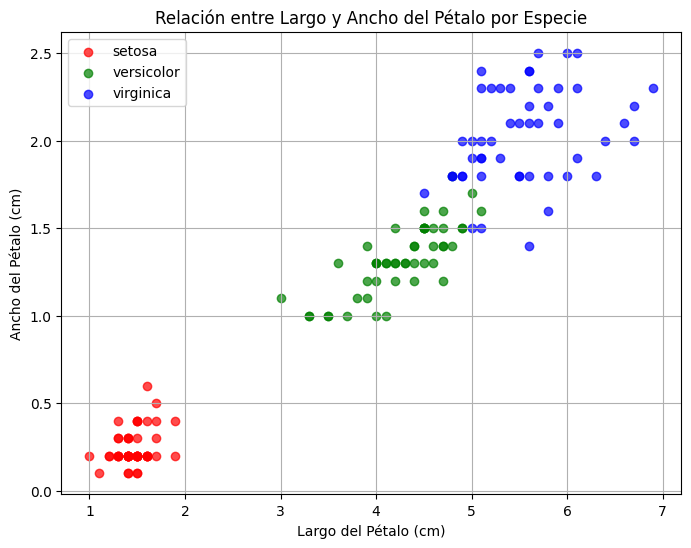

In [7]:
# Preparamos la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Definimos colores para cada especie
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Iteramos sobre cada especie para pintarla de un color diferente
for species_name, group in iris_df.groupby('species_name'):
    ax.scatter(group['petal length (cm)'], group['petal width (cm)'],
               c=colors[species_name], label=species_name, alpha=0.7)

# Añadimos etiquetas, título y leyenda
ax.set_xlabel('Largo del Pétalo (cm)')
ax.set_ylabel('Ancho del Pétalo (cm)')
ax.set_title('Relación entre Largo y Ancho del Pétalo por Especie')
ax.legend()
ax.grid(True)

# Mostramos el gráfico
plt.show()

> **Análisis Visual:** Observa cómo la especie 'setosa' (puntos rojos) forma un grupo claramente separado de las otras dos. 'Versicolor' (verde) y 'virginica' (azul) están más cerca e incluso tienen cierta superposición. Esto nos da una intuición sobre la dificultad del problema: separar 'setosa' será fácil, pero distinguir entre 'versicolor' y 'virginica' será más desafiante.

---

### 5. División Train-Test

Este es el paso más importante de hoy. Como vimos en clase, **NUNCA** debemos evaluar nuestro modelo con los mismos datos que usamos para entrenarlo. Para simular un escenario realista, dividimos nuestros datos en un conjunto de entrenamiento y uno de prueba.

- `X`: Contendrá nuestras características (features).
- `y`: Contendrá nuestra variable objetivo (target).

In [8]:
# Separamos las características (X) de la variable objetivo (y)
X = iris_df.drop(columns=['species', 'species_name'])
y = iris_df['species']  # Usamos la versión numérica del target

In [9]:
# Verificamos las dimensiones de X e y
print("Dimensiones de X (features):", X.shape)
print("Dimensiones de y (target):", y.shape)

Dimensiones de X (features): (150, 4)
Dimensiones de y (target): (150,)


In [13]:
# Usamos la función train_test_split de scikit-learn
# test_size=0.2 significa que el 20% de los datos se usará para el conjunto de prueba
# random_state=42 asegura que la división sea siempre la misma. Esto es crucial para la reproducibilidad.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# El parámetro 'stratify=y' es importante en clasificación. 
# Asegura que la proporción de cada clase en el target sea la misma en el conjunto de entrenamiento y de prueba.

In [14]:
# Verifiquemos las dimensiones de los conjuntos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (105, 4)
Dimensiones de X_test: (45, 4)
Dimensiones de y_train: (105,)
Dimensiones de y_test: (45,)


---

### 🏆 Desafíos y Próximos Pasos

¡Felicidades! Has completado los primeros pasos de cualquier proyecto de Machine Learning.

Ahora, experimenta un poco:

1.  **Cambia el tamaño del test:** Vuelve a la celda de `train_test_split` y cambia el `test_size` a `0.3` (30%). Vuelve a ejecutar las celdas y observa cómo cambian las dimensiones de los conjuntos. ¿Qué implicaciones tiene usar un conjunto de prueba más grande o más pequeño?

2.  **Explora los datos de entrenamiento:** Calcula el promedio (`.mean()`) de la característica 'sepal width (cm)' pero **solo para el conjunto de entrenamiento** (`X_train`). ¿Por qué es importante hacer este tipo de cálculos solo sobre los datos de entrenamiento?

3.  **Comprueba la estratificación:** Usa `.value_counts(normalize=True)` tanto en `y_train` como en `y_test` para verificar que la proporción de cada especie es aproximadamente la misma en ambos conjuntos.

In [12]:
# Espacio para resolver los desafíos

# Desafío 2: Promedio de 'sepal width (cm)' en X_train
mean_sepal_width_train = X_train['sepal width (cm)'].mean()
print(f"El promedio de 'sepal width (cm)' en el entrenamiento es: {mean_sepal_width_train:.2f}")

# Desafío 3: Comprobar la estratificación
print("\nProporción de clases en y_train:")
print(y_train.value_counts(normalize=True))

print("\nProporción de clases en y_test:")
print(y_test.value_counts(normalize=True))

El promedio de 'sepal width (cm)' en el entrenamiento es: 3.05

Proporción de clases en y_train:
species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Proporción de clases en y_test:
species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


--- 
## ✏️ Ejercicios Adicionales para Completar

Usa las celdas de código a continuación para resolver los siguientes ejercicios. El objetivo es que practiques y te familiarices con las operaciones que hemos aprendido.

**1. Estadísticas Descriptivas:**
   - Calcula la media, mediana y desviación estándar de la característica `sepal length (cm)` para todo el dataset.

**2. Filtrado y Agrupación:**
   - Filtra el DataFrame para seleccionar únicamente las flores de la especie `virginica`.
   - Sobre este subconjunto de datos, calcula el valor promedio de `petal width (cm)`.

**3. Creación de Histogramas:**
   - Usando `matplotlib`, crea un histograma para la característica `sepal width (cm)`.
   - Experimenta cambiando el número de `bins` (por ejemplo, a 10, 20 o 30) para ver cómo cambia la visualización de la distribución.

**4. Otra Visualización:**
   - Crea un nuevo gráfico de dispersión (scatter plot) que compare `sepal length (cm)` vs `sepal width (cm)`.
   - Asegúrate de colorear los puntos según la especie y de añadir una leyenda y etiquetas a los ejes.

**5. Búsqueda por Condición:**
   - ¿Cuántas flores en el dataset tienen un `petal length (cm)` mayor que 6.0? Crea un nuevo DataFrame que contenga solo estas flores.

**6. Re-división de Datos:**
   - Realiza un nuevo `train_test_split` sobre `X` e `y`.
   - Esta vez, utiliza un `test_size` del 33% (`0.33`) y un `random_state` de `100`.
   - Imprime las dimensiones de los nuevos conjuntos para verificar el resultado.

**7. Ingeniería de Características Simple:**
   - Crea una nueva columna en `iris_df` llamada `petal_area`.
   - El valor de esta columna debe ser el resultado de multiplicar `petal length (cm)` por `petal width (cm)`.
   - ¿Cuál es la media del área del pétalo (`petal_area`) para todo el dataset?

**8. Análisis de Correlación:**
   - Calcula la matriz de correlación para las cuatro características numéricas (`X`).
   - (Pista: los DataFrames de pandas tienen un método `.corr()`).
   - ¿Qué par de características tiene la correlación positiva más alta? ¿Qué significa esto?

**9. El Efecto de la Estratificación:**
   - Realiza un `train_test_split` pero esta vez **sin** el parámetro `stratify=y`.
   - Compara la distribución de clases (usando `value_counts(normalize=True)`) en el `y_train` y `y_test` resultantes con la que obtuvimos en el ejercicio guiado (que sí usaba estratificación).
   - ¿Notas alguna diferencia importante? ¿Por qué la estratificación es útil?

**10. Generalizando el Proceso:**
   - `scikit-learn` tiene otros datasets. Carga el dataset de vinos (`load_wine`).
   - Conviértelo en un DataFrame de pandas como hicimos con Iris.
   - Realiza los 3 primeros pasos de la exploración de datos: muestra las primeras filas (`.head()`), obtén la información general (`.info()`) y el resumen estadístico (`.describe()`).

Ejercicio #1
Media de 'sepal length (cm)': 5.84
Mediana de 'sepal length (cm)': 5.80
Desviación estándar de 'sepal length (cm)': 0.83
# ----------------------------------------------------------------------------------------------


Ejercicio #2
Promedio de 'petal width (cm)' para virginica: 2.03
# ----------------------------------------------------------------------------------------------


Ejercicio #3


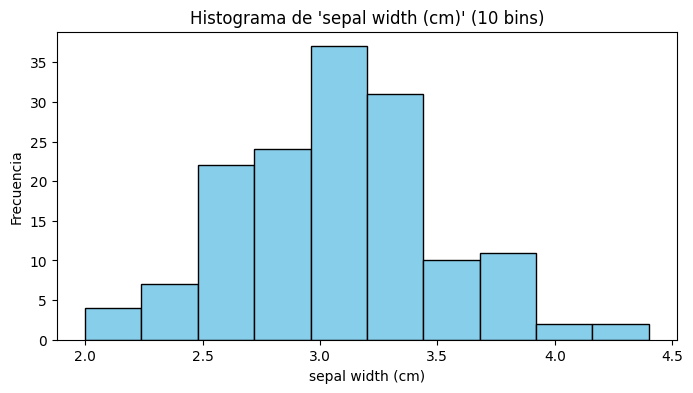

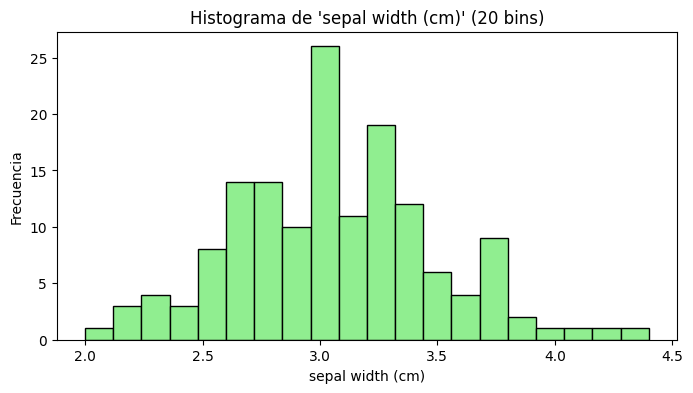

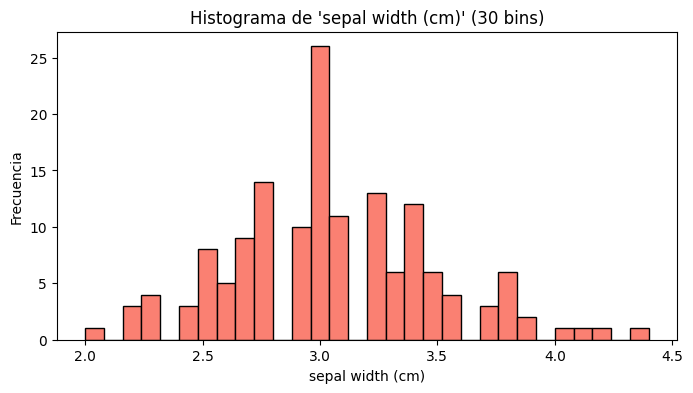

# ----------------------------------------------------------------------------------------------


Ejercicio #4


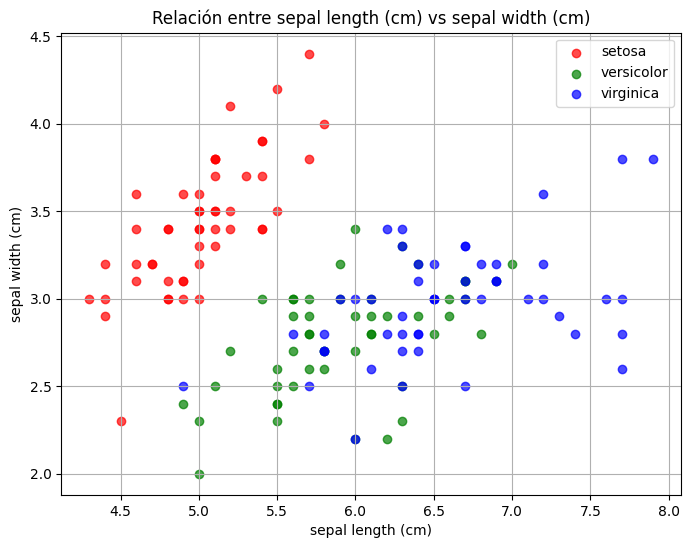

# ----------------------------------------------------------------------------------------------


Ejercicio #5
Cant. de flores con 'petal length (cm)' > 6.0: 9
# ----------------------------------------------------------------------------------------------


Ejercicio #6
Dimensiones de X_train2: (100, 4)
Dimensiones de X_test2: (50, 4)
Dimensiones de y_train2: (100,)
Dimensiones de y_test2: (50,)
# ----------------------------------------------------------------------------------------------


Ejercicio #7
Media del área del pétalo (petal_area): 5.79
# ----------------------------------------------------------------------------------------------


Ejercicio #8
Matriz de correlación:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000



El par de características con la correlación positiva más alta es: ('petal length (cm)', 'petal width (cm)') (0.96)

Conclusión:
Esto significa que estas dos variables parecen aumentar juntas.
# ----------------------------------------------------------------------------------------------


Ejercicio #9
Proporción de clases en y_train (sin estratificar):
species
1    0.352381
2    0.352381
0    0.295238
Name: proportion, dtype: float64

Proporción de clases en y_test (sin estratificar):
species
0    0.422222
1    0.288889
2    0.288889
Name: proportion, dtype: float64

Conclusión:
Sin estratificación, la distribución es dispareja, tanto en entrenamiento como en test.
# ----------------------------------------------------------------------------------------------


Ejercicio #10
Primeras 5 filas del dataset de vinos:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Información general del dataset de vinos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline              

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# ----------------------------------------------------------------------------------------------




In [38]:
# Espacio de trabajo para los ejercicios

# Ejercicio 1:
media_sepal_length = iris_df['sepal length (cm)'].mean()
mediana_sepal_length = iris_df['sepal length (cm)'].median()
std_sepal_length = iris_df['sepal length (cm)'].std()

print("Ejercicio #1")
print(f"Media de 'sepal length (cm)': {media_sepal_length:.2f}")
print(f"Mediana de 'sepal length (cm)': {mediana_sepal_length:.2f}")
print(f"Desviación estándar de 'sepal length (cm)': {std_sepal_length:.2f}")
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 2:
virginica_df = iris_df[iris_df['species_name'] == 'virginica']
mean_petal_width_virginica = virginica_df['petal width (cm)'].mean()

print("Ejercicio #2")
print(f"Promedio de 'petal width (cm)' para virginica: {mean_petal_width_virginica:.2f}")
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 3:
print("Ejercicio #3")
# 10 bins
plt.figure(figsize=(8, 4))
plt.hist(iris_df['sepal width (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histograma de 'sepal width (cm)' (10 bins)")
plt.xlabel('sepal width (cm)')
plt.ylabel('Frecuencia')
plt.show()

# 20 bins
plt.figure(figsize=(8, 4))
plt.hist(iris_df['sepal width (cm)'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histograma de 'sepal width (cm)' (20 bins)")
plt.xlabel('sepal width (cm)')
plt.ylabel('Frecuencia')
plt.show()

# 30 bins
plt.figure(figsize=(8, 4))
plt.hist(iris_df['sepal width (cm)'], bins=30, color='salmon', edgecolor='black')
plt.title("Histograma de 'sepal width (cm)' (30 bins)")
plt.xlabel('sepal width (cm)')
plt.ylabel('Frecuencia')
plt.show()

print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 4:
fig, ax = plt.subplots(figsize=(8, 6))

colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for species, group in iris_df.groupby('species_name'):
    ax.scatter(group['sepal length (cm)'], group['sepal width (cm)'],
               c=colors[species], label=species, alpha=0.7)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('Relación entre sepal length (cm) vs sepal width (cm)')
ax.legend()
ax.grid(True)

print("Ejercicio #4")
plt.show()
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 5:
petal_length_mayor_6 = iris_df[iris_df['petal length (cm)'] > 6.0]

print("Ejercicio #5")
print(f"Cant. de flores con 'petal length (cm)' > 6.0: {petal_length_mayor_6.shape[0]}")
petal_length_mayor_6.head()
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 6:
print("Ejercicio #6")
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=100, stratify=y)

print("Dimensiones de X_train2:", X_train2.shape)
print("Dimensiones de X_test2:", X_test2.shape)
print("Dimensiones de y_train2:", y_train2.shape)
print("Dimensiones de y_test2:", y_test2.shape)
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 7:
iris_df['petal_area'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']

mean_petal_area = iris_df['petal_area'].mean()

print("Ejercicio #7")
print(f"Media del área del pétalo (petal_area): {mean_petal_area:.2f}")
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 8:
print("Ejercicio #8")
correlation_mat = X.corr()
print("Matriz de correlación:")
display(correlation_mat)

# Hay que excluir la diagonal porque en una matriz de correlación la diagonal representa la 
# correlación de cada variable consigo misma, que siempre es 1 (correlación perfecta).
corr_pairs = correlation_mat.where(~np.eye(correlation_mat.shape[0],dtype=bool))
max_corr = corr_pairs.max().max()
max_pair = corr_pairs.stack().idxmax()

print(f"\nEl par de características con la correlación positiva más alta es: {max_pair} ({max_corr:.2f})")
print("\nConclusión:")
print("Esto significa que estas dos variables parecen aumentar juntas.")
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 9:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ejercicio #9")
print("Proporción de clases en y_train (sin estratificar):")
print(y_train_ns.value_counts(normalize=True))
print("\nProporción de clases en y_test (sin estratificar):")
print(y_test_ns.value_counts(normalize=True))

print("\nConclusión:")
print("Sin estratificación, la distribución es dispareja, tanto en entrenamiento como en test.")
print("# ----------------------------------------------------------------------------------------------")
print("\n")


# Ejercicio 10:
print("Ejercicio #10")
from sklearn.datasets import load_wine

# Carga de dataset de vinos
wine_raw = load_wine()

# Convertir a DataFrame
wine_df = pd.DataFrame(data=wine_raw.data, columns=wine_raw.feature_names)
wine_df['target'] = wine_raw.target

# 1. Mostrar las primeras filas
print("Primeras 5 filas del dataset de vinos:")
display(wine_df.head())

# 2. Información general
print("\nInformación general del dataset de vinos:")
wine_df.info()

# 3. Resumen estadístico
print("\nResumen estadístico del dataset de vinos:")
display(wine_df.describe())
print("# ----------------------------------------------------------------------------------------------")
print("\n")